<a href="https://colab.research.google.com/github/team0243/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

**นำข้อมูลเข้า**

In [2]:
data = pd.read_csv('/content/Pizza.csv')

In [ ]:
data

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [48]:
data = pd.read_csv('/content/Pizza.csv')
data.head(12)

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,14082,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,14097,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,14117,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,14133,27.72,21.19,45.29,5.16,1.66,0.64,4.95


**ตรวจสอบขนาดข้อมูลว่ามีกี่แถวกี่หลัก**

In [49]:
data.shape # คู่อันดับ (X,Y) เมื่อ X= แถว Y = หลัก

(300, 9)

**plot scatter ของ data ทั้งหมด**

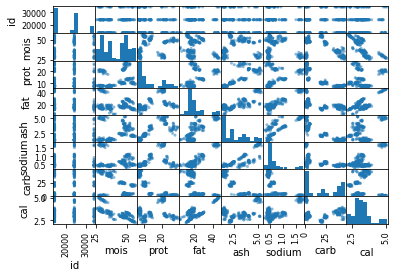

In [50]:
pd.plotting.scatter_matrix(data);

#**plot scatter ของ data ที่ตัด column ที่ไม่ได้ใช้**

In [70]:
new_data = data.iloc[:,2:]
new_data.head()

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [71]:
corr = np.corrcoef(new_data.to_numpy().T)


In [72]:
corr

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [73]:
corr.shape

(7, 7)

In [74]:
for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            if (i !=j )  and (corr[i,j] == 1.):
                print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

**ลบ column ที่ไม่ใช่ตัวเลขออก**

In [76]:
new_data = data.drop(['brand','id'], axis=1) #ตัวหนังสือสีแดงคือชื่อ column ที่ไม่ใช่ตัวเลข
new_data

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [101]:
new_data2 = data.drop(['id'], axis=1) #ต้องการให้กราฟที่ plot ออกมามีการเปรียบเทียบแบรนด์ ดังนั้นต้องทำการลบ column ส่วน id ออก
new_data2

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


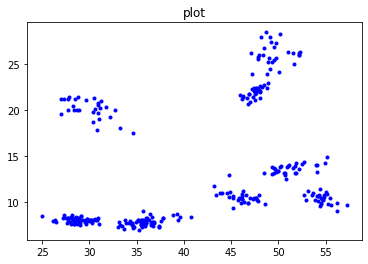

In [77]:
plt.plot(new_data.iloc[:,0],new_data.iloc[:,1],'b.');
plt.title('plot');

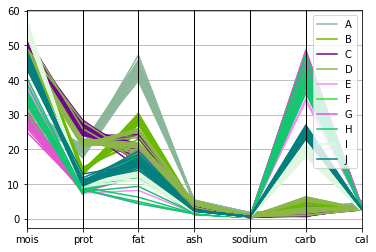

In [79]:
pd.plotting.parallel_coordinates(data,'brand',cols=['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal' ]) 

In [80]:
pca = PCA(n_components=2)

In [81]:
new_pca = pca.fit_transform(new_data.to_numpy())

In [82]:
new_pca.shape

(300, 2)

In [84]:
b_d= set(data['brand'])
b_d

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

**สร้าง color list ข้อมูลจะเรียงตามลำดับ**

In [86]:
b_d1 = list(b_d)  ## แปลงเป็น list
b_d1.sort()  ### เรียงจากน้อยไปมาก
color_list2 = {}     ### คำสั่งวนลูปเพื่อเปลี่ยนข้อมูลเป็นตัวเลข
num = 0
for each_fg in b_d1:
     if each_fg not in color_list2:
       color_list2[each_fg] = num
       num += 1 

In [ ]:
color_list2

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

In [102]:
data_dropped = new_data2.replace(color_list2)

In [88]:
data_dropped

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,9,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


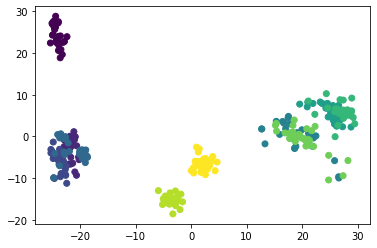

In [103]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped['brand'])

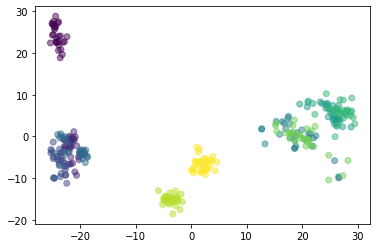

In [104]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped['brand'],alpha=0.5)

In [ ]:
b2 = data_dropped[(data_dropped['brand']==0) | (data_dropped['brand']==8)]
b2

In [125]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(b2.iloc[:,1:].to_numpy())

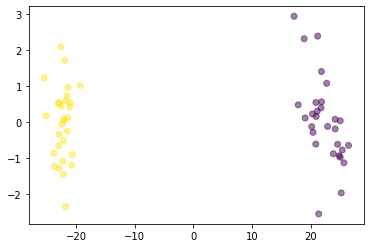

In [136]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = b2['brand'],alpha=0.5)

**เปรียบเที่ยบสารอาหาร**

เปรียบเที่ยบ แบรนด์ A กับ แบรนด์ I

In [137]:
A_pca = pca.transform(b2[b2['brand']==0].iloc[:,1:].to_numpy())
I_pca = pca.transform(b2[b2['brand']==8].iloc[:,1:].to_numpy())

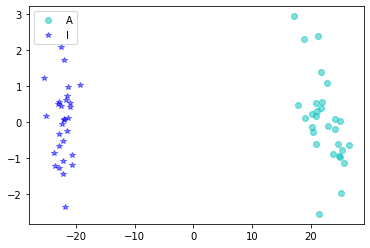

In [140]:
plt.plot(A_pca[:,0],A_pca[:,1],'oc',alpha=0.5,label='A')
plt.plot(I_pca[:,0],I_pca[:,1],'*b',alpha=0.5,label='I')
plt.legend()

In [141]:
pca.explained_variance_ratio_

array([0.99599976, 0.00237647])

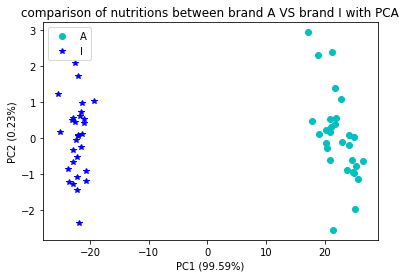

In [143]:
plt.plot(A_pca[:,0],A_pca[:,1],'oc',alpha=1,label='A')
plt.plot(I_pca[:,0],I_pca[:,1],'*b',alpha=1,label='I')
plt.legend()
plt.title('comparison of nutritions between brand A VS brand I with PCA') #ตั้งชื่อกราฟ
plt.xlabel('PC1 (99.59%)') #ชื่อแกน X
plt.ylabel('PC2 (0.23%)'); #ชื่อแกน Y

ทำให้สรุปได้ว่า เมื่อปชเปรียบเทียบระหว่างแบรนด์ A และแบรนด์ I แล้วทำให้อธิบายความแปรปรวนได้  99.59% และ 0.23%

**component ที่เหมาะสมที่ถูกเลือกมาใช้จะครอบคลุม variance ประมาณ 80–90% ซึ่งจากที่เปรียบเทียบระหว่าง  แบรนด์ A และ แบรนด์ I  ซึ่ง PC1 + PC2 รวมกันได้เท่ากับ 99.82% ดังนั้นจึงอธิบายได้ครอบคลุม**

###ข้อ 2

In [144]:
data = pd.read_csv('nndb_flat.csv')   ###  นำข้อมูลไฟล์อีกตัวเข้ามา 

In [147]:
data.head(11) ## แสดง 11แถว

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.0,0.24,65.0,0.380,0.520,0.070,184.0,0.019,0.50,20.0,0.034,188.0,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300.0,19.80,24.26,0.46,0.46,0.0,241.0,0.227,1.30,0.0,0.21,62.0,0.630,0.488,0.028,388.0,0.021,0.33,20.0,0.038,347.0,14.5,2.38,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376.0,25.18,29.20,3.06,0.00,0.0,271.0,0.074,0.27,0.0,0.00,18.0,0.180,0.450,0.031,673.0,0.024,0.64,22.0,0.021,490.0,14.5,2.94,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406.0,24.04,33.82,1.33,0.28,0.0,263.0,0.049,0.88,0.0,0.78,26.0,0.039,0.434,0.027,675.0,0.056,0.16,27.0,0.033,473.0,28.3,3.43,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387.0,23.37,30.60,4.78,0.00,0.0,233.0,0.074,0.83,0.0,0.00,18.0,0.080,0.293,0.046,643.0,0.042,0.21,21.0,0.012,464.0,14.5,2.79,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


In [149]:
data.shape   ### ขนาดของ data

(8618, 45)

**เลือกเฉพาะ column ที่มีตัวเลข**

In [151]:
newdata = data.iloc[:,7:]   #ตั้งแต่หลัก 0-7 ข้อมูลไม่มีตัวเลขซึ่งเราไม่ได้ใช้ ดังนั้นตัดทิ้งโลด
newdata.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [ ]:
หาค่า correlation ได้ดังนี้

In [152]:
corr = np.corrcoef(newdata.to_numpy().T)   
corr

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

In [ ]:
##หา หลัก ที่มีค่า corr เท่ากับ 1 โดยการใช้ for loop

In [155]:
for f in range(corr.shape[0]):
    for g in range(corr.shape[1]):
        if (f !=g) and (corr[f,g] == 1.):
            print(f'หลัก = {f} เท่ากับ หลัก = {g} ที่ค่า corr = {corr[f,g]}')

หลัก = 11 เท่ากับ หลัก = 28 ที่ค่า corr = 1.0
หลัก = 12 เท่ากับ หลัก = 29 ที่ค่า corr = 1.0
หลัก = 13 เท่ากับ หลัก = 30 ที่ค่า corr = 1.0
หลัก = 14 เท่ากับ หลัก = 31 ที่ค่า corr = 1.0
หลัก = 16 เท่ากับ หลัก = 33 ที่ค่า corr = 1.0
หลัก = 18 เท่ากับ หลัก = 34 ที่ค่า corr = 1.0
หลัก = 28 เท่ากับ หลัก = 11 ที่ค่า corr = 1.0
หลัก = 29 เท่ากับ หลัก = 12 ที่ค่า corr = 1.0
หลัก = 30 เท่ากับ หลัก = 13 ที่ค่า corr = 1.0
หลัก = 31 เท่ากับ หลัก = 14 ที่ค่า corr = 1.0
หลัก = 33 เท่ากับ หลัก = 16 ที่ค่า corr = 1.0
หลัก = 34 เท่ากับ หลัก = 18 ที่ค่า corr = 1.0


พลอตกราฟแสดง column ที่มีค่า corr เท่ากับ 1

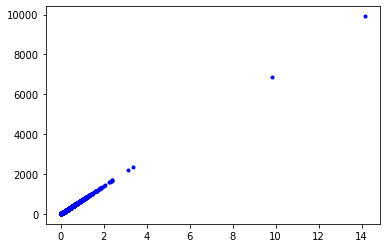

In [164]:
plt.plot(newdata.iloc[:,35],newdata.iloc[:,20],'b.')

In [ ]:
##ลบ หลักที่ มีค่า corr = 1

In [169]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
newdata_dropped

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [168]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Selenium_mcg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


plot กราฟ parallel

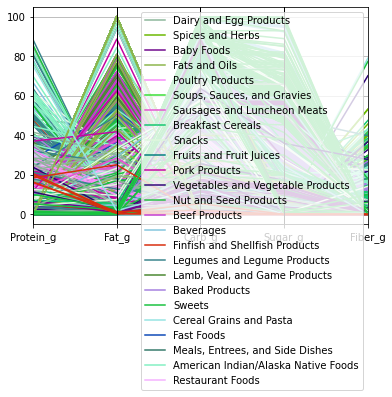

In [170]:
pd.plotting.parallel_coordinates(data_dropped,'FoodGroup',cols=['Protein_g','Fat_g','Carb_g','Sugar_g',	'Fiber_g'])

##PCA

In [175]:
pca = PCA(n_components=2)

In [172]:
new_pca = pca.fit_transform(newdata_dropped.to_numpy())

In [176]:
new_pca

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

In [173]:
new_pca.shape   #-ขนาดของ new_pca

(8618, 2)

In [177]:
G = set(data['FoodGroup'])
G

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

**กำหนดให้ text เป็น ตัวเลข เพื่อใช้ในการ พลอตกราฟ**

In [178]:
G_l = list(G)  ### แปลงเป็น list
G_l.sort() ### เรียงค่่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_fg in G_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

In [179]:
color_list2

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

In [180]:
data_dropped2 = data_dropped.replace(color_list2)

In [181]:
data_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,23,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,10,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**plot กราฟ scatter**

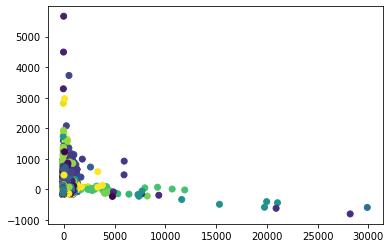

In [201]:
plt.scatter(new_pca[:,0],new_pca[:,1
],c = data_dropped2['FoodGroup'])

In [204]:
b2 = data_dropped2[(data_dropped2['FoodGroup']==8) | (data_dropped2['FoodGroup']==23)]  # ใช้  | และ  &  แทน  or  และ  and  ใน pandas
b2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
6013,23,359.0,1.00,2.68,82.82,57.58,0.0,6.0,0.300,0.00,56.0,4.0,18.0,0.171,0.75,0.184,0.006667,0.176471,0.000000,0.622222,0.037333,0.0100,0.006250,0.076923,0.035833,0.015000,0.000190,0.033333,0.034286,0.049091,0.017273
6014,23,371.0,0.10,3.00,85.80,49.16,0.0,6.0,0.300,0.00,120.0,2.0,32.0,0.171,1.01,0.184,0.006667,0.176471,0.000000,1.333333,0.037333,0.0050,0.006250,0.015385,0.070000,0.026667,0.000190,0.047619,0.044286,0.007273,0.017273
6051,23,387.0,1.59,3.31,87.73,56.32,0.1,0.0,0.010,0.00,0.0,11.0,36.0,0.130,0.80,0.047,0.000000,0.005882,0.000000,0.000000,0.043333,0.0275,0.013125,0.053846,0.046667,0.030000,0.000144,0.052381,0.081429,0.040000,0.036364
6052,23,479.0,4.13,26.93,59.51,48.34,5.0,0.0,0.000,0.00,0.7,0.0,64.0,0.000,1.27,0.000,0.000000,0.000000,0.000000,0.007778,0.000000,0.0000,0.000000,0.000000,0.000000,0.053333,0.000000,0.000000,0.160000,0.000000,0.000000
6053,23,338.0,2.97,1.70,79.38,0.00,0.1,0.0,0.000,0.00,0.0,0.0,12.0,0.000,0.55,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.067143,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8606,23,181.0,0.41,0.20,44.38,37.75,2.6,1.0,0.029,0.00,0.7,1.0,27.0,0.112,0.80,0.215,0.001111,0.017059,0.000000,0.007778,0.015333,0.0025,0.005687,0.026154,0.019167,0.022500,0.000124,0.023810,0.017143,0.007273,0.009091
8608,23,365.0,10.08,3.00,74.42,0.70,10.1,0.0,0.027,0.00,0.0,0.0,50.0,0.854,3.87,0.887,0.000000,0.015882,0.000000,0.000000,0.001333,0.0000,0.034063,0.080769,0.020833,0.041667,0.000949,0.261905,0.248571,0.092727,0.135455
8609,23,351.0,1.60,0.10,86.04,2.90,0.9,0.0,0.000,0.00,0.0,0.0,49.0,0.040,0.05,0.000,0.000000,0.000000,0.000000,0.000000,0.003333,0.0000,0.000000,0.000000,0.000000,0.040833,0.000044,0.040476,0.017143,0.016364,0.017273
8610,23,350.0,0.81,0.90,84.66,0.90,0.8,0.0,0.005,0.05,0.0,1.0,143.0,0.038,0.38,0.041,0.000000,0.002941,0.020833,0.000000,0.005333,0.0025,0.000875,0.016154,0.004167,0.119167,0.000042,0.011905,3.382857,0.014545,0.009091


In [205]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(b2.iloc[:,1:].to_numpy())

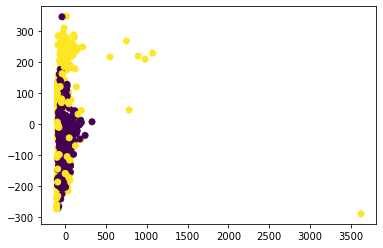

In [206]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = b2['FoodGroup'],alpha=1)

In [211]:
pca.explained_variance_ratio_

array([0.5846152 , 0.33893516])

In [218]:
F_pca = pca.transform(b2[b2['FoodGroup']==8].iloc[:,1:].to_numpy())     ### กำหนดให้ FoodGroup ที่เท่ากับ 8 เป็นอาหารกลุ่ม Fast Foods
S_pca = pca.transform(b2[b2['FoodGroup']==23].iloc[:,1:].to_numpy())        #### กำหนดให้ FoodGroup ที่เท่ากับ 23 เป็นอาหา่รกลุ่ม Sweets

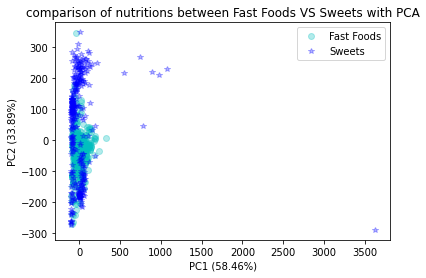

In [219]:
plt.plot(F_pca[:,0],F_pca[:,1],'oc',alpha=0.3,label='Fast Foods')
plt.plot(S_pca[:,0],S_pca[:,1],'*b',alpha=0.3,label='Sweets')
plt.legend()
plt.title('comparison of nutritions between Fast Foods VS Sweets with PCA')    #### ใส่ชื่อกราฟ
plt.xlabel('PC1 (58.46%)')
plt.ylabel('PC2 (33.89%)');

**component ที่เหมาะสมที่ถูกเลือกมาใช้จะครอบคลุม variance ประมาณ 80–90% ซึ่งจากที่เปรียบเทียบระหว่าง  Fast Foods VS Sweets ซึ่ง PC1 + PC2 รวมกันได้เท่ากับ 92.35% ดังนั้นจึงอธิบายได้ครอบคลุม**

In [ ]:
''